<div style = "color : red;"><b>

# Season VIII 
## Habib Ezzatabadi
<br><br><br>
<br>
<hr><hr><br><br><br>
</div></b>

<div style = "color : blue;"><b>
Ex. 8.1 The final model fitted to the timber data did not constrain the fitted curves to go through the origin, although this is clearly necessary. Fit an amended model where this constraint is satisfied, and plot the new predicted values.

</b> </div> <br><br>

In [205]:
library(tidyverse)
library(ggpubr)
library(lme4)
library(nlme)
library(lattice)

In [20]:
# timber_dat <- read.table(file = file.choose())
names(timber_dat) <- NULL
Nam <- c("specimen", "slippage", "loads")
dat1 <- timber_dat[, 1:3] %>% data.matrix; dat2 <- timber_dat[, 4:6] %>% 
data.matrix
timber_dat2 <- rbind(dat1, dat2) %>% as.data.frame %>%
setNames(Nam) %>% 
mutate(specimen = paste0("spec", specimen))
timber_dat2

specimen,slippage,loads
<chr>,<dbl>,<dbl>
spec7,0.4,8.29
spec8,0.4,8.32
spec1,0.5,9.78
spec2,0.5,10.94
spec3,0.5,9.72
spec4,0.5,8.32
spec5,0.5,9.64
spec6,0.5,10.72
spec7,0.5,9.86


In [36]:
Model1 <- lmer(loads ~ slippage  + I(slippage^2) + 
(0 + slippage | specimen) -1, data = timber_dat2, REML = F)

In [37]:
summary(Model1)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: loads ~ slippage + I(slippage^2) + (0 + slippage | specimen) -      1
   Data: timber_dat2

     AIC      BIC   logLik deviance df.resid 
    99.2    106.4    -45.6     91.2       40 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6707 -0.6193  0.1292  0.7763  2.2592 

Random effects:
 Groups   Name     Variance Std.Dev.
 specimen slippage 0.08435  0.2904  
 Residual          0.38661  0.6218  
Number of obs: 44, groups:  specimen, 8

Fixed effects:
              Estimate Std. Error t value
slippage       22.2431     0.3504   63.47
I(slippage^2)  -6.4478     0.2127  -30.32

Correlation of Fixed Effects:
            slippg
I(slippg^2) -0.930

In [38]:
coef(Model1)

$specimen
      slippage I(slippage^2)
spec1 22.42000     -6.447782
spec2 22.29442     -6.447782
spec3 22.10970     -6.447782
spec4 21.85456     -6.447782
spec5 22.57213     -6.447782
spec6 22.49293     -6.447782
spec7 22.19322     -6.447782
spec8 22.00769     -6.447782

attr(,"class")
[1] "coef.mer"

In [47]:
dat1 <- coef(Model1)[][[1]]
dat1 %>% 
rownames_to_column(var = "specimen") -> dat2
dat2

specimen,slippage,I(slippage^2)
<chr>,<dbl>,<dbl>
spec1,22.42000,-6.447782
spec2,22.29442,-6.447782
spec3,22.10970,-6.447782
spec4,21.85456,-6.447782
spec5,22.57213,-6.447782
spec6,22.49293,-6.447782
spec7,22.19322,-6.447782
spec8,22.00769,-6.447782


In [60]:
dat <- timber_dat2 %>%
mutate(slope_slippage = NA, slope_slippage2 = dat2[1, 3])
dat %>% head

,specimen,slippage,loads,slope_slippage,slope_slippage2
,<chr>,<dbl>,<dbl>,<lgl>,<dbl>
1,spec7,0.4,8.29,NA,-6.447782
2,spec8,0.4,8.32,NA,-6.447782
3,spec1,0.5,9.78,NA,-6.447782
4,spec2,0.5,10.94,NA,-6.447782
5,spec3,0.5,9.72,NA,-6.447782
6,spec4,0.5,8.32,NA,-6.447782


In [61]:
for(i in 1:8){
    index <- dat2[i, 1]
    val <- dat2[i, 2]
    ind <- index == dat$specimen 
    dat$slope_slippage[ind] <- val
}
dat %>% head

,specimen,slippage,loads,slope_slippage,slope_slippage2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,spec7,0.4,8.29,22.19322,-6.447782
2,spec8,0.4,8.32,22.00769,-6.447782
3,spec1,0.5,9.78,22.42000,-6.447782
4,spec2,0.5,10.94,22.29442,-6.447782
5,spec3,0.5,9.72,22.10970,-6.447782
6,spec4,0.5,8.32,21.85456,-6.447782


In [97]:
f <- function(x, a) a * x + dat2[1, 3] * x^2
names(dat)

[1] "specimen"        "slippage"        "loads"           "slope_slippage" 
[5] "slope_slippage2"

In [120]:
Plots <- list()
flag <- 0
main_list <- unique(dat$specimen)
for(i in unique(main_list)){
    flag = flag + 1
    aa <- dat2 %>% dplyr :: filter(specimen == i) %>% .[2] %>%
    as.numeric
    Plots[[flag]] <- dat %>%
        dplyr :: filter(specimen == i) %>%
        ggplot(aes(x = slippage, y = loads)) + 
        geom_point(size = 3) + 
        stat_function(fun = f, xlim = extendrange(dat$slippage), 
        args = list(a = aa), linewidth = 1.5, colour = 2) +
        labs(title = i, 
        caption = paste0("slope slippage = ", round(aa, 4))) +
        theme_bw()
}
main_list

[1] "spec7" "spec8" "spec1" "spec2" "spec3" "spec4" "spec5" "spec6"

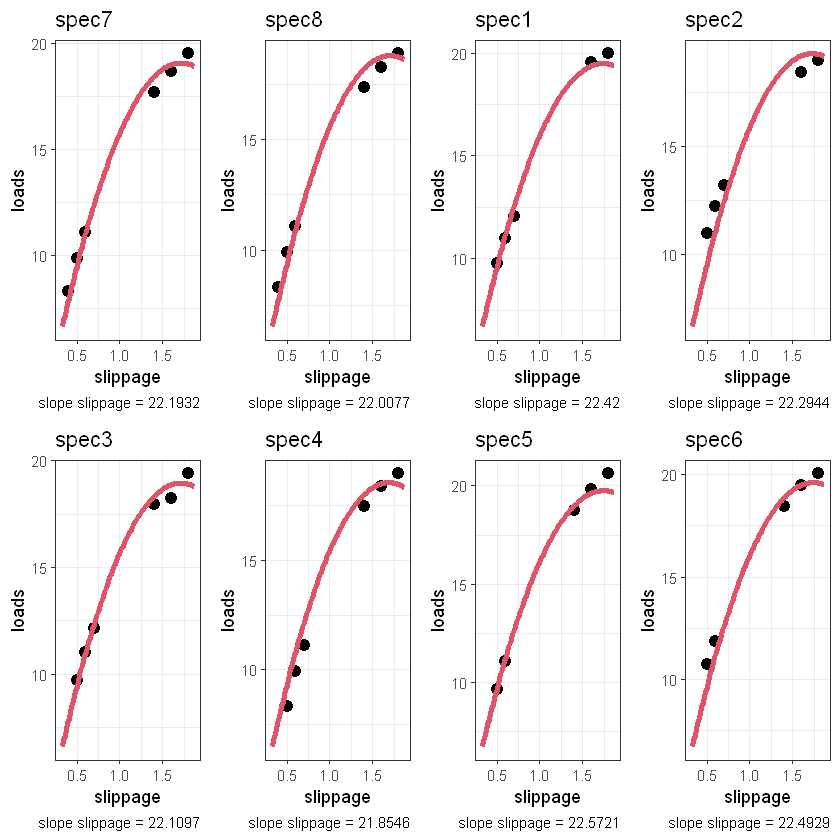

In [122]:
ggarrange(Plots[[1]], Plots[[2]], 
Plots[[3]], Plots[[4]], Plots[[5]], Plots[[6]], 
Plots[[7]], Plots[[8]],
ncol = 4, nrow = 2)

<hr>
<br><br>
<div style = "color : blue;"><b>

Ex. 8.2 Investigate a further model for the glucose challenge data that allows
a random quadratic effect.

<br></b></div>

In [124]:
#glucose_data <- read.table(file = file.choose())
names(glucose_data) <- NULL
Nam2 <- c("Subject", "group", "time", "plasma")
data1 <- glucose_data[, 1:4] %>% data.matrix; data2 <- glucose_data[, 5:8] %>% 
data.matrix


In [143]:
glucose_data2 <- rbind(data1, data2) %>% as.data.frame %>%
setNames(Nam2) %>% 
mutate(Subject = case_when(
    Subject == 1 ~ "01", 
    Subject == 2 ~ "02", 
    Subject == 3 ~ "03", 
    Subject == 4 ~ "04", 
    Subject == 5 ~ "05", 
    Subject == 6 ~ "06", 
    Subject == 7 ~ "07", 
    Subject == 8 ~ "08", 
    Subject == 9 ~ "09", 
    TRUE ~ as.character(Subject)
)) %>%
mutate(Subject = paste0("id", Subject))
glucose_data2

Subject,group,time,plasma
<chr>,<dbl>,<dbl>,<dbl>
id01,1,1,4.3
id02,1,1,3.7
id03,1,1,4.0
id04,1,1,3.6
id05,1,1,4.1
id06,1,1,3.8
id07,1,1,3.8
id08,1,1,4.4
id09,1,1,5.0


In [146]:
Model_1 <- lme(plasma ~ time*group +I(time^2),
random = ~time | Subject,
data = glucose_data2, method = "ML")
summary(Model_1)

Linear mixed-effects model fit by maximum likelihood
  Data: glucose_data2 
       AIC      BIC    logLik
  383.3149 415.4984 -182.6574

Random effects:
 Formula: ~time | Subject
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev     Corr  
(Intercept) 0.64189717 (Intr)
time        0.07626153 -0.631
Residual    0.38480115       

Fixed effects:  plasma ~ time * group + I(time^2) 
                Value Std.Error  DF   t-value p-value
(Intercept)  3.662604 0.3844549 228  9.526747  0.0000
time        -0.647352 0.0695839 228 -9.303178  0.0000
group        0.996703 0.2548268  31  3.911296  0.0005
I(time^2)    0.084668 0.0052177 228 16.227179  0.0000
time:group  -0.111864 0.0347638 228 -3.217819  0.0015
 Correlation: 
           (Intr) time   group  I(t^2)
time       -0.631                     
group      -0.924  0.475              
I(time^2)   0.204 -0.675  0.000       
time:group  0.631 -0.696 -0.683  0.000

Standardized Within-Group Residuals:
        M

In [147]:
Model_lme4_1 <- lmer(plasma ~ time*group +I(time^2) + 
(time | Subject), REML = F, data = glucose_data2)
summary(Model_lme4_1)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: plasma ~ time * group + I(time^2) + (time | Subject)
   Data: glucose_data2

     AIC      BIC   logLik deviance df.resid 
   383.3    415.5   -182.7    365.3      255 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.72437 -0.53606 -0.01072  0.58568  2.95028 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 Subject  (Intercept) 0.412050 0.64191       
          time        0.005816 0.07626  -0.63
 Residual             0.148071 0.38480       
Number of obs: 264, groups:  Subject, 33

Fixed effects:
             Estimate Std. Error t value
(Intercept)  3.662604   0.380803   9.618
time        -0.647352   0.068923  -9.392
group        0.996703   0.252407   3.949
I(time^2)    0.084668   0.005168  16.383
time:group  -0.111864   0.034434  -3.249

Correlation of Fixed Effects:
           (Intr) time   group  I(t^2)
time       -0.631                     
group      -0.924  0.475              


In [148]:
Model_lme4_2 <- lmer(plasma ~ time*group +I(time^2) + 
(time + I(time^2) | Subject), REML = F, data = glucose_data2)
summary(Model_lme4_2)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge with max|grad| = 0.0126049 (tol = 0.002, component 1)"


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: plasma ~ time * group + I(time^2) + (time + I(time^2) | Subject)
   Data: glucose_data2

     AIC      BIC   logLik deviance df.resid 
   385.0    427.9   -180.5    361.0      252 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.87652 -0.54529  0.00285  0.55988  2.92997 

Random effects:
 Groups   Name        Variance  Std.Dev. Corr       
 Subject  (Intercept) 0.6233901 0.78955             
          time        0.0566409 0.23799  -0.72      
          I(time^2)   0.0004933 0.02221   0.60 -0.95
 Residual             0.1342822 0.36645             
Number of obs: 264, groups:  Subject, 33

Fixed effects:
             Estimate Std. Error t value
(Intercept)  3.565709   0.385774   9.243
time        -0.628894   0.077598  -8.104
group        1.066215   0.250585   4.255
I(time^2)    0.084668   0.006259  13.528
time:group  -0.125105   0.034001  -3.679

Correlation of Fixed Effects:
           (Intr) time  

In [149]:
anova(Model_lme4_1, Model_lme4_2)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Model_lme4_1,9,383.3149,415.4984,-182.6574,365.3149,NA,NA,NA
Model_lme4_2,12,384.9573,427.8687,-180.4787,360.9573,4.357585,3,0.2253506


<hr><br><br><br>
<div style = "color : blue;"> <b>

Ex. 8.3 Fit an independence model to the Beat the Blues data, and compare the estimated treatment 
effect confidence interval with that from the
random intercept model described in the text.

<br><br></b></div>

In [160]:
#btheb <- read.table(file = file.choose(), stringsAsFactors = TRUE)
names(btheb) <- NULL
Nam3 <- c("drug", "length", "treatment", "bdi.pre", "bdi.2m", "bdi.3m", "bdi.5m", "bdi.8m")
btheb %>% setNames(Nam3) -> btheb

In [161]:
sum(is.na(btheb))

[1] 120

In [164]:
btheb %>% head
btheb %>% dim

,drug,length,treatment,bdi.pre,bdi.2m,bdi.3m,bdi.5m,bdi.8m
,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>
1,No,>6m,TAU,29,2,2,NA,NA
2,Yes,>6m,BtheB,32,16,24,17,20
3,Yes,<6m,TAU,25,20,NA,NA,NA
4,No,>6m,BtheB,21,17,16,10,9
5,Yes,>6m,BtheB,26,23,NA,NA,NA
6,Yes,<6m,BtheB,7,0,0,0,0


[1] 100   8

[1] "1"   "2"   "3"   "4"   "5"   "6"   "7"   "8"   "9"   "10"  "11"  "12" 
 [13] "13"  "14"  "15"  "16"  "17"  "18"  "19"  "20"  "21"  "22"  "23"  "24" 
 [25] "25"  "26"  "27"  "28"  "29"  "30"  "31"  "32"  "33"  "34"  "35"  "36" 
 [37] "37"  "38"  "39"  "40"  "41"  "42"  "43"  "44"  "45"  "46"  "47"  "48" 
 [49] "49"  "50"  "51"  "52"  "53"  "54"  "55"  "56"  "57"  "58"  "59"  "60" 
 [61] "61"  "62"  "63"  "64"  "65"  "66"  "67"  "68"  "69"  "70"  "71"  "72" 
 [73] "73"  "74"  "75"  "76"  "77"  "78"  "79"  "80"  "81"  "82"  "83"  "84" 
 [85] "85"  "86"  "87"  "88"  "89"  "90"  "91"  "92"  "93"  "94"  "95"  "96" 
 [97] "97"  "98"  "99"  "100"

In [166]:
btheb %>%
mutate(Subject = paste0("id", rownames(btheb))) %>% 
relocate("Subject", .before = "drug") -> btheb
head(btheb)

,Subject,drug,length,treatment,bdi.pre,bdi.2m,bdi.3m,bdi.5m,bdi.8m
,<chr>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>
1,id1,No,>6m,TAU,29,2,2,NA,NA
2,id2,Yes,>6m,BtheB,32,16,24,17,20
3,id3,Yes,<6m,TAU,25,20,NA,NA,NA
4,id4,No,>6m,BtheB,21,17,16,10,9
5,id5,Yes,>6m,BtheB,26,23,NA,NA,NA
6,id6,Yes,<6m,BtheB,7,0,0,0,0


In [167]:
nobs <- nrow(btheb)
btheb_long <- reshape(btheb, idvar = "Subject",
varying = c("bdi.2m", "bdi.3m", "bdi.5m", "bdi.8m"),
direction = "long")
btheb_long$time <- rep(c(2, 3, 5, 8), rep(nobs, 4))

In [169]:
dim(btheb_long)
btheb_long %>% head

[1] 400   7

,Subject,drug,length,treatment,bdi.pre,time,bdi
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>
id1.2m,id1,No,>6m,TAU,29,2,2
id2.2m,id2,Yes,>6m,BtheB,32,2,16
id3.2m,id3,Yes,<6m,TAU,25,2,20
id4.2m,id4,No,>6m,BtheB,21,2,17
id5.2m,id5,Yes,>6m,BtheB,26,2,23
id6.2m,id6,Yes,<6m,BtheB,7,2,0


In [173]:
BtheB_lme1 <- lme(bdi ~ bdi.pre + time + treatment + drug +
length, random = ~ 1 | Subject, data = btheb_long,
na.action = na.omit)
summary(BtheB_lme1)

Linear mixed-effects model fit by REML
  Data: btheb_long 
       AIC      BIC    logLik
  1882.903 1911.808 -933.4513

Random effects:
 Formula: ~1 | Subject
        (Intercept) Residual
StdDev:    7.206358 5.028555

Fixed effects:  bdi ~ bdi.pre + time + treatment + drug + length 
                 Value Std.Error  DF   t-value p-value
(Intercept)   3.258641 2.2706119 182  1.435138  0.1530
bdi.pre       0.640351 0.0799164  92  8.012758  0.0000
time         -0.701598 0.1469407 182 -4.774702  0.0000
treatmentTAU  2.315105 1.7151530  92  1.349795  0.1804
drugYes      -2.815994 1.7729198  92 -1.588337  0.1156
length>6m     0.179015 1.6816346  92  0.106453  0.9155
 Correlation: 
             (Intr) bdi.pr time   trtTAU drugYs
bdi.pre      -0.600                            
time         -0.222  0.019                     
treatmentTAU -0.361 -0.121 -0.017              
drugYes      -0.319 -0.236 -0.022  0.323       
length>6m    -0.245 -0.241 -0.036 -0.002  0.157

Standardized Within-Group R

In [177]:
est_treat_text <- coef(BtheB_lme1)[1, 4]
est_treat_text

[1] 2.315105

In [180]:
attributes(summary(BtheB_lme1))
mm <- summary(BtheB_lme1)

$names
 [1] "modelStruct"  "dims"         "contrasts"    "coefficients" "varFix"      
 [6] "sigma"        "apVar"        "logLik"       "numIter"      "groups"      
[11] "call"         "terms"        "method"       "fitted"       "residuals"   
[16] "fixDF"        "na.action"    "data"         "corFixed"     "tTable"      
[21] "BIC"          "AIC"         

$class
[1] "summary.lme" "lme"        

$verbose
[1] FALSE

$oClass
[1] "lme"

In [188]:
mm$varFix -> cov_BtheB_text
std_treat_text <- cov_BtheB_text[4, 4] %>% sqrt
std_treat_text
dff <- mm$fixDF$X[4]
dff

[1] 1.715153

treatmentTAU 
          92

In [189]:
qt(.957, df = dff) -> tvalue
CI_treat_text_model <- c(`lower-bond` = est_treat_text - tvalue * std_treat_text, 
`upper-bond` = est_treat_text + tvalue * std_treat_text) %>% as.data.frame
CI_treat_text_model

,.
,<dbl>
lower-bond,-0.6615484
upper-bond,5.2917586


In [191]:
Model_ind <- gls(bdi ~ bdi.pre + time + treatment + drug +
length, data = btheb_long, method = "REML",
na.action = na.omit)

summary(Model_ind)

Generalized least squares fit by REML
  Model: bdi ~ bdi.pre + time + treatment + drug + length 
  Data: btheb_long 
       AIC      BIC    logLik
  2010.979 2036.271 -998.4893

Coefficients:
                 Value Std.Error   t-value p-value
(Intercept)   4.000367 1.6848313  2.374343  0.0183
bdi.pre       0.573963 0.0549747 10.440500  0.0000
time         -0.937843 0.2365022 -3.965471  0.0001
treatmentTAU  3.322536 1.1006886  3.018597  0.0028
drugYes      -3.568663 1.1471681 -3.110846  0.0021
length>6m     1.710675 1.1105646  1.540365  0.1246

 Correlation: 
             (Intr) bdi.pr time   trtTAU drugYs
bdi.pre      -0.521                            
time         -0.549  0.036                     
treatmentTAU -0.287 -0.136 -0.020              
drugYes      -0.214 -0.295 -0.038  0.318       
length>6m    -0.139 -0.316 -0.057 -0.028  0.149

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.72991267 -0.62462502  0.00174166  0.61414387  3.14391816 


In [193]:
mm2 <- summary(Model_ind)
attributes(mm2)

$names
 [1] "modelStruct"  "dims"         "contrasts"    "coefficients" "varBeta"     
 [6] "sigma"        "apVar"        "logLik"       "numIter"      "groups"      
[11] "call"         "terms"        "method"       "fitted"       "residuals"   
[16] "parAssign"    "na.action"    "corBeta"      "tTable"       "BIC"         
[21] "AIC"         

$verbose
[1] FALSE

$class
[1] "summary.gls" "gls"

In [203]:
est_ind_treat <- mm2$coefficients[4]
cov_ind <- mm2$varBeta
std_treat_ind <- cov_ind[4, 4] %>% sqrt 
dff <- 274
tval2 <- qt(.975, df = dff)
CI_treat_ind <- c(`lower-bond` = est_ind_treat - tval2 * std_treat_ind, 
`upper-bond` = est_ind_treat + tval2 * std_treat_ind) %>% as.data.frame
CI_treat_ind

,.
,<dbl>
lower-bond.treatmentTAU,1.155654
upper-bond.treatmentTAU,5.489417


<hr> <br><br><br>

<div style = "color : blue;"> <b>

Ex. 8.4 Construct a plot of the mean profiles of the two treatment groups in
the Beat the Blues study showing also the predicted mean profiles under
the model used in the chapter. Repeat the exercise with a model that
includes only a time effect.

</div></b>
<br><br>

In [212]:
new_btheb_long <- na.omit(btheb_long)
new_btheb_long$pred_text_model <- predict(BtheB_lme1)

pfun <- function(x, y, subscripts, groups) {  
      panel.xyplot(x, y[1:length(x)], pch = c(1:2)[groups[subscripts]])
     panel.lines(x, y[1:length(x) + length(x)], lty = 1)
}



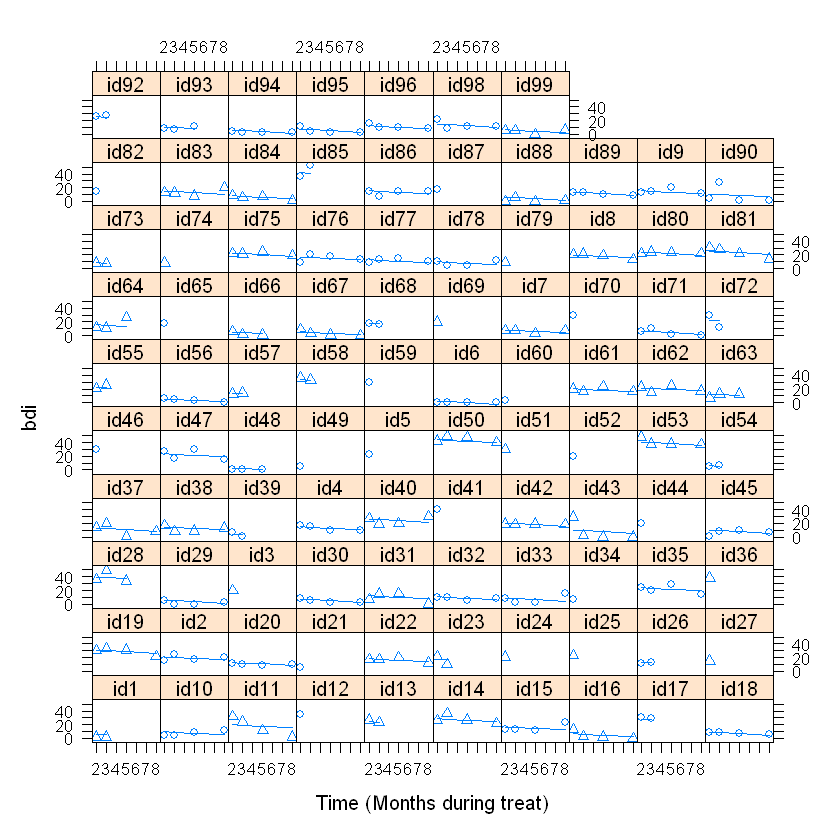

In [222]:
plot(xyplot(cbind(bdi, pred_text_model) ~ time | Subject, data = new_btheb_long, groups = treatment,
    type = "b", pch = c(1, 2), ylab = "bdi",     
    xlab = "Time (Months during treat)", panel = pfun))

In [220]:
BtheB_lme2 <- gls(bdi ~ time -1, data = btheb_long,
na.action = na.omit, method = "REML")
summary(BtheB_lme2)

Generalized least squares fit by REML
  Model: bdi ~ time - 1 
  Data: btheb_long 
       AIC      BIC   logLik
  2276.021 2283.283 -1136.01

Coefficients:
        Value Std.Error  t-value p-value
time 2.551434 0.1831337 13.93208       0

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.4606043 -0.3465980  0.1765417  0.8932985  3.2448480 

Residual standard error: 13.97468 
Degrees of freedom: 280 total; 279 residual

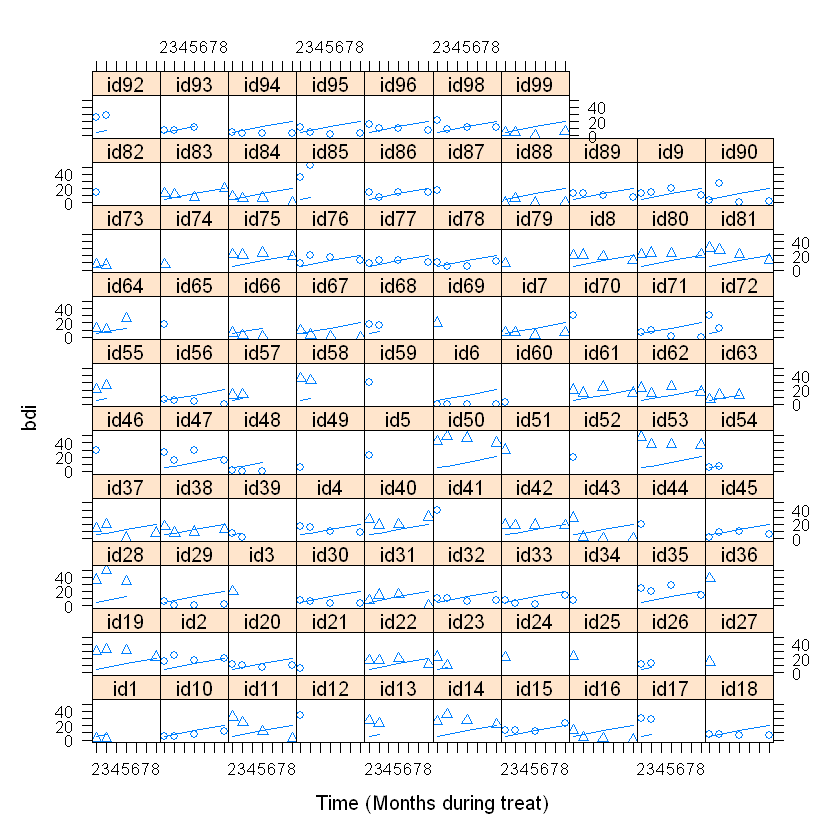

In [221]:
new_btheb_long$pred_time_effect_model <- predict(BtheB_lme2)
plot(xyplot(cbind(bdi, pred_time_effect_model) ~ time | Subject, data = new_btheb_long, groups = treatment,
    type = "b", pch = c(19, 21), ylab = "bdi",     
    xlab = "Time (Months during treat)", panel = pfun))

<hr> <br><br><br>

<div style = "color : blue;"><b>

Ex. 8.5 Investigate whether there is any evidence of an interaction between
treatment and time for the Beat the Blues data.

</div></b>
<br><br>

In [235]:
Model_interaction <- lmer(bdi ~ bdi.pre + time + treatment + time:treatment + drug +
length + (1 | Subject), data = btheb_long,
na.action = na.omit, REML = F)
summary(Model_interaction)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: bdi ~ bdi.pre + time + treatment + time:treatment + drug + length +  
    (1 | Subject)
   Data: btheb_long

     AIC      BIC   logLik deviance df.resid 
  1886.7   1919.4   -934.3   1868.7      271 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5433 -0.5015 -0.0868  0.4087  3.7447 

Random effects:
 Groups   Name        Variance Std.Dev.
 Subject  (Intercept) 49.92    7.065   
 Residual             24.57    4.956   
Number of obs: 280, groups:  Subject, 97

Fixed effects:
                  Estimate Std. Error t value
(Intercept)        2.38020    2.28837   1.040
bdi.pre            0.64046    0.07843   8.166
time              -0.46556    0.20132  -2.313
treatmentTAU       4.09804    1.98490   2.065
drugYes           -2.79209    1.73986  -1.605
length>6m          0.21905    1.65043   0.133
time:treatmentTAU -0.49000    0.28959  -1.692

Correlation of Fixed Effects:
            (Intr) bdi.pr time   trtT

In [236]:
Model_text <- lmer(bdi ~ bdi.pre + time + treatment + drug +
length +  (1 | Subject), data = btheb_long,
na.action = na.omit, REML = F)
anova(Model_text, Model_interaction)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Model_text,8,1887.492,1916.570,-935.7460,1871.492,NA,NA,NA
Model_interaction,9,1886.690,1919.404,-934.3452,1868.690,2.801534,1,0.09417417


In [237]:
Model_interaction_nlme <- lme(bdi ~ bdi.pre + time + treatment + time:treatment + drug +
length, random = ~1 | Subject, data = btheb_long,
na.action = na.omit, method = "ML")
summary(Model_interaction_nlme)

Linear mixed-effects model fit by maximum likelihood
  Data: btheb_long 
      AIC      BIC    logLik
  1886.69 1919.404 -934.3452

Random effects:
 Formula: ~1 | Subject
        (Intercept) Residual
StdDev:    7.065214 4.956454

Fixed effects:  bdi ~ bdi.pre + time + treatment + time:treatment + drug + length 
                      Value Std.Error  DF   t-value p-value
(Intercept)        2.380202 2.3175259 181  1.027044  0.3058
bdi.pre            0.640455 0.0794325  92  8.062891  0.0000
time              -0.465555 0.2038806 181 -2.283468  0.0236
treatmentTAU       4.098036 2.0101824  92  2.038639  0.0444
drugYes           -2.792094 1.7620285  92 -1.584591  0.1165
length>6m          0.219054 1.6714600  92  0.131055  0.8960
time:treatmentTAU -0.489998 0.2932791 181 -1.670758  0.0965
 Correlation: 
                  (Intr) bdi.pr time   trtTAU drugYs lngt>6
bdi.pre           -0.584                                   
time              -0.314  0.015                            
treatmentTAU

In [238]:
Model_text_nlme <- lme(bdi ~ bdi.pre + time + treatment +  drug +
length, random = ~1 | Subject, data = btheb_long,
na.action = na.omit, method = "ML")
summary(Model_text_nlme)

Linear mixed-effects model fit by maximum likelihood
  Data: btheb_long 
       AIC     BIC   logLik
  1887.492 1916.57 -935.746

Random effects:
 Formula: ~1 | Subject
        (Intercept) Residual
StdDev:    6.984081 5.013978

Fixed effects:  bdi ~ bdi.pre + time + treatment + drug + length 
                 Value Std.Error  DF   t-value p-value
(Intercept)   3.263311 2.2378212 182  1.458254  0.1465
bdi.pre       0.639676 0.0787396  92  8.123950  0.0000
time         -0.704765 0.1479856 182 -4.762386  0.0000
treatmentTAU  2.329083 1.6885457  92  1.379342  0.1711
drugYes      -2.824952 1.7456397  92 -1.618291  0.1090
length>6m     0.197079 1.6561584  92  0.118998  0.9055
 Correlation: 
             (Intr) bdi.pr time   trtTAU drugYs
bdi.pre      -0.599                            
time         -0.227  0.020                     
treatmentTAU -0.360 -0.121 -0.018              
drugYes      -0.318 -0.237 -0.022  0.323       
length>6m    -0.244 -0.242 -0.036 -0.002  0.157

Standardized With

In [239]:
anova(Model_interaction_nlme, Model_text_nlme)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
Model_interaction_nlme,"lme.formula(fixed = bdi ~ bdi.pre + time + treatment + time:treatment + drug + length, data = btheb_long, random = ~1 | Subject, method = ""ML"", na.action = na.omit)",1,9,1886.690,1919.404,-934.3452,,NA,NA
Model_text_nlme,"lme.formula(fixed = bdi ~ bdi.pre + time + treatment + drug + length, data = btheb_long, random = ~1 | Subject, method = ""ML"", na.action = na.omit)",2,8,1887.492,1916.570,-935.7460,1 vs 2,2.801534,0.09417417
